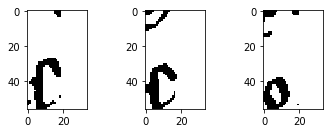

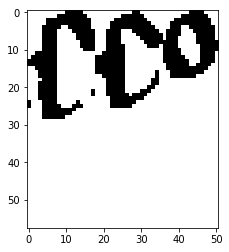

In [2]:
import matplotlib.pyplot as plt
from random import sample
import os
import numpy as np
import cv2


dataset_folder = '/home/eris/Dropbox/original_samples/'

characters = os.listdir(dataset_folder)
characters.remove('.dropbox')

dataset_filenames = {char: [dataset_folder+char+'/'+f for f in os.listdir(dataset_folder+char)] for char in characters}

word = 'sso'
images = []

%matplotlib inline
plt.figure()
for i,c in enumerate(word):
    if c == 's':
        if i < len(word)-1:
            c = 's_alta'
        else:
            c = sample(['s_alta', 's_mediana', 's_bassa'], 1)[0]
    if c == 'd':
        c = sample(['d_alta', 'd_mediana'],1)[0]
        
    s = sample(dataset_filenames[c], 1)
    img = cv2.imread(s[0], cv2.IMREAD_GRAYSCALE)
    
    comp_n, labels, stats, centroids = cv2.connectedComponentsWithStats(cv2.bitwise_not(img))
    stats = sorted(stats, key=lambda s: s[4])
    
    char_x, char_y, char_w, char_h, char_a = stats[-2]
    
    images.append(img[char_y:char_y+char_h,char_x:char_x+char_w])
    plt.subplot(2, len(word), i + 1)
    plt.imshow(img, cmap='gray')
plt.show()

width, height = np.sum([img.shape[1] for img in images]), np.max([img.shape[0] for img in images])*2

blank = np.ones((height, width), dtype='uint8')*255

for i,image in enumerate(images):
    start_x = int(np.sum([i.shape[1] for i in images[:i]]))
    end_x = start_x + image.shape[1]
    blank[:image.shape[0],start_x:end_x] = cv2.bitwise_and(blank[:image.shape[0],start_x:end_x], image)

plt.imshow(np.asarray(blank), cmap='gray')
plt.show()
    


